# For this project I will be investigating data from the [Sean Lahman baseball](http://www.seanlahman.com/baseball-archive/statistics/) database. The database contains information on player demographics, player salaries, player statistics, and awards. This investigation will be primarily focused on characteristics of top earners vs. medium earners. Do high salary players always outperform? Are certain performance metrics key indicators of high salaries? 

# For this analysis I define "top earners" as players with salaries in the 90th percentile and "medium earners" as players between the 50th and 60th percentile. 

# I will also investigate how batting and pitching statistics have changed over time which can potentially give some insight on trends in the game. What are the patterns over time in performance metrics? How has the game evolved over time?

# Baseball historians like to label different periods of time into separate eras based on various classifications, including rule changes or trends on how the game is being played. For this analysis I will focus on player data from 1975-2016. I chose 1975 as a starting point as free agency was established which gave players many rights they didn't have before. 2016 is the last season for which statistics are available (each year's data is available after each season). For more on the different baseball eras, visit this [Huffington Post](http://www.huffingtonpost.com/quora/what-are-the-major-eras-o_b_3547814.html) article. Salary data is only available from 1985 onward which is a bit restricting but luckly that is still 32 full years of data to look at.

## Note: the analysis in this investigation will not include any advanced statistical methods and will be based on a heuristics and simple statistical analysis.

In [1]:
import pandas as pd
import numpy as np

%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# importing master file, exploring basic demographics
master_df = pd.read_csv('baseballdatabank-2017.1/core/Master.csv')
master_df.shape

(19105, 24)

In [3]:
master_df.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,18973.000000,18803.000000,18656.000000,9441.000000,9440.000000,9439.000000,18251.000000,18320.000000
mean,1931.435356,6.629474,15.614816,1964.287364,6.483581,15.569552,186.375596,72.273799
std,41.555514,3.468103,8.750216,31.808030,3.529655,8.779552,21.524765,2.603904
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1895.000000,4.000000,8.000000,1942.000000,3.000000,8.000000,170.000000,71.000000
50%,1937.000000,7.000000,16.000000,1967.000000,6.000000,15.000000,185.000000,72.000000
75%,1969.000000,10.000000,23.000000,1990.000000,10.000000,23.000000,200.000000,74.000000
max,1996.000000,12.000000,31.000000,2017.000000,12.000000,31.000000,320.000000,83.000000


In [4]:
master_modern = master_df[master_df['debut'] >= '1975-01-01']
master_modern.shape

(7704, 24)

In [5]:
master_modern.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,7704.000000,7704.000000,7704.000000,170.000000,170.000000,170.000000,7704.000000,7704.000000
mean,1973.174974,6.665758,15.786734,2007.352941,6.617647,16.652941,198.701194,73.525182
std,11.736816,3.464070,8.750576,8.719435,3.619594,8.856022,21.704099,2.273153
min,1946.000000,1.000000,1.000000,1977.000000,1.000000,1.000000,140.000000,66.000000
25%,1964.000000,4.000000,8.000000,2004.000000,3.000000,9.000000,185.000000,72.000000
50%,1974.000000,7.000000,16.000000,2010.000000,6.000000,17.000000,195.000000,74.000000
75%,1983.000000,10.000000,23.000000,2014.000000,10.000000,24.750000,210.000000,75.000000
max,1996.000000,12.000000,31.000000,2017.000000,12.000000,31.000000,320.000000,83.000000


In [6]:
print 'Earliest player debut: ', master_modern['debut'].min()
print 'Latest player debut: ', master_modern['debut'].max()

Earliest player debut:  1975-04-07
Latest player debut:  2016-10-02


In [7]:
# adding debut year column:
def return_debut_year(df):
    return int(df['debut'][:4])

In [8]:
master_modern['debut_year'] = master_modern.apply(return_debut_year,axis=1)

/home/joey/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
master_modern.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height,debut_year
count,7704.000000,7704.000000,7704.000000,170.000000,170.000000,170.000000,7704.000000,7704.000000,7704.000000
mean,1973.174974,6.665758,15.786734,2007.352941,6.617647,16.652941,198.701194,73.525182,1997.799974
std,11.736816,3.464070,8.750576,8.719435,3.619594,8.856022,21.704099,2.273153,11.911323
min,1946.000000,1.000000,1.000000,1977.000000,1.000000,1.000000,140.000000,66.000000,1975.000000
25%,1964.000000,4.000000,8.000000,2004.000000,3.000000,9.000000,185.000000,72.000000,1988.000000
50%,1974.000000,7.000000,16.000000,2010.000000,6.000000,17.000000,195.000000,74.000000,1999.000000
75%,1983.000000,10.000000,23.000000,2014.000000,10.000000,24.750000,210.000000,75.000000,2008.000000
max,1996.000000,12.000000,31.000000,2017.000000,12.000000,31.000000,320.000000,83.000000,2016.000000



### From the table above, we can see that 7,704 players have debuted in the MLB since the year 1975. The oldest player was born in 1946 and the yougest was born 1996. Only 170 players have recorded deaths, which seems rather small and may be under reported as some player deaths might not be recorded or publicly known. For this analysis I will change these missing values to the value zero, which is not a valid entry for year, month, or day.


### Below we will explore player height and weight data.

In [10]:
master_modern.fillna(0,inplace=True)
master_modern.describe()

/home/joey/anaconda2/envs/py27/lib/python2.7/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height,debut_year
count,7704.000000,7704.000000,7704.000000,7704.000000,7704.000000,7704.000000,7704.000000,7704.000000,7704.000000
mean,1973.174974,6.665758,15.786734,44.295171,0.146028,0.367471,198.701194,73.525182,1997.799974
std,11.736816,3.464070,8.750576,294.901571,1.110225,2.775954,21.704099,2.273153,11.911323
min,1946.000000,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,66.000000,1975.000000
25%,1964.000000,4.000000,8.000000,0.000000,0.000000,0.000000,185.000000,72.000000,1988.000000
50%,1974.000000,7.000000,16.000000,0.000000,0.000000,0.000000,195.000000,74.000000,1999.000000
75%,1983.000000,10.000000,23.000000,0.000000,0.000000,0.000000,210.000000,75.000000,2008.000000
max,1996.000000,12.000000,31.000000,2017.000000,12.000000,31.000000,320.000000,83.000000,2016.000000


Text(0.5,0,u'Inches')

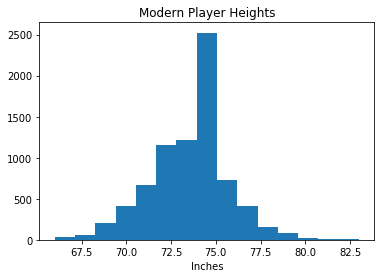

In [11]:
plt.hist(master_modern['height'],bins=15)
plt.title('Modern Player Heights')
plt.xlabel('Inches')

Text(0.5,0,u'Pounds')

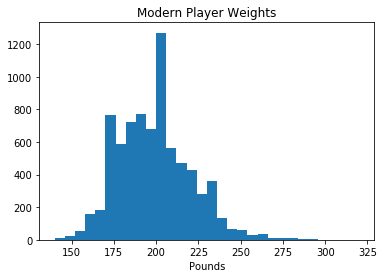

In [12]:
plt.hist(master_modern['weight'],bins=30)
plt.title('Modern Player Weights')
plt.xlabel('Pounds')

### Above we see the distribution of modern player heights and weights. Both histograms show a clear medians. By far the most common heights lie around 74-75 inches (just over 6 feet tall) and players are typically just over 200 pounds. Heights have a tighter distribution which makes sense as weights have much more room to deviate. 

In [13]:
modern_weights_birth_mean = master_modern.groupby('birthYear').mean()['weight']
modern_weights_birth_median = master_modern.groupby('birthYear').median()['weight']
modern_weights_debut_mean = master_modern.groupby('debut_year').mean()['weight']
modern_weights_debut_median = master_modern.groupby('debut_year').median()['weight']

In [14]:
modern_heights_birth_mean = master_modern.groupby('birthYear').mean()['height']
modern_heights_birth_median = master_modern.groupby('birthYear').median()['height']
modern_heights_debut_mean = master_modern.groupby('debut_year').mean()['height']
modern_heights_debut_median = master_modern.groupby('debut_year').median()['height']

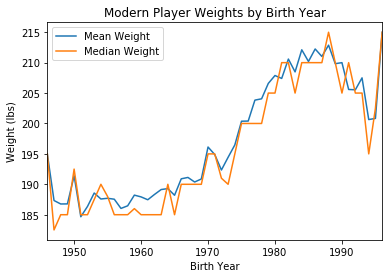

In [15]:
plt.plot(modern_weights_birth_mean)
plt.plot(modern_weights_birth_median)
plt.title('Modern Player Weights by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Weight (lbs)')
plt.xlim(1946,1996)
plt.legend(['Mean Weight','Median Weight'],loc='best')

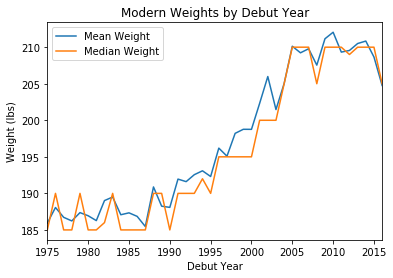

In [16]:
plt.plot(modern_weights_debut_mean)
plt.plot(modern_weights_debut_median)
plt.title('Modern Weights by Debut Year')
plt.xlabel('Debut Year')
plt.ylabel('Weight (lbs)')
plt.xlim(1975,2016)
plt.legend(['Mean Weight','Median Weight'],loc='best')

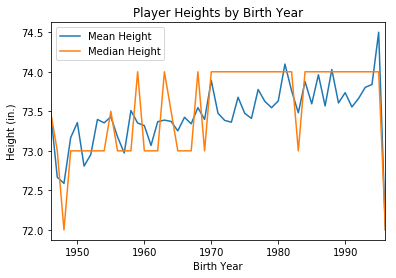

In [17]:
plt.plot(modern_heights_birth_mean)
plt.plot(modern_heights_birth_median)
plt.title('Player Heights by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Height (in.)')
plt.xlim(1946,1996)
plt.legend(['Mean Height','Median Height'],loc='best')


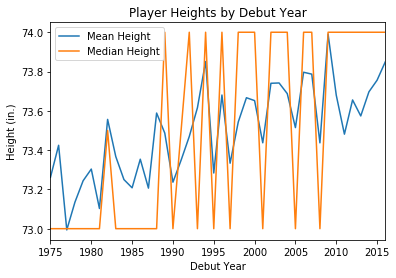

In [18]:
plt.plot(modern_heights_debut_mean)
plt.plot(modern_heights_debut_median)
plt.title('Player Heights by Debut Year')
plt.xlabel('Debut Year')
plt.ylabel('Height (in.)')
plt.xlim(1975,2016)
plt.legend(['Mean Height','Median Height'],loc='best')

### From the four charts above we can see that over time both mean and median heights and weights have a general upward trend. Player weights have increased more than player heights. Over the years there has been a greater emphasis put on players to bulk up and maintain physical conditioning throughout a player's career.

### Mean and median heights by birth year have dropped off for the most recent birth year (1996). This is due to small sample size and will be investigated below. There is only one player born in 1996 to debut in our dataset, and his weight is 215 lbs and his height is 72 inches (6 feet). This data point makes it look like weights are increasing again and heights are decreasing for data by birth year. Thus, it is more reasonable to look for weight and height trends in the player debut year charts.

In [19]:
print 'number of players born in 1996 to debut: ', master_modern[master_modern['birthYear'] == 1996].shape[0]
print 'weight of player: ', master_modern[master_modern['birthYear'] == 1996]['weight']
print 'height of player: ', master_modern[master_modern['birthYear'] == 1996]['height']


number of players born in 1996 to debut:  1
weight of player:  17577    215.0
Name: weight, dtype: float64
height of player:  17577    72.0
Name: height, dtype: float64


# Investigating modern batting data:

In [20]:
batting_df = pd.read_csv('baseballdatabank-2017.1/core/Batting.csv')

In [21]:
batting_df.shape

(102816, 22)

In [22]:
batting_modern = batting_df[batting_df['yearID'] >= 1975]
batting_modern.shape

(50151, 22)

In [23]:
batting_modern.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000,50151.000000
mean,1997.335168,1.077885,51.772667,127.262727,16.751132,33.251221,6.216805,0.762856,3.486870,15.832007,2.495364,1.128332,12.199019,23.091683,1.042591,1.029969,1.327611,1.069131,2.858767
std,11.947250,0.280570,46.488987,182.755708,26.911009,51.109379,10.064775,1.721361,7.186238,26.343874,6.924525,2.561803,20.574667,33.113993,2.737724,2.309087,2.593201,1.997463,4.720703
min,1975.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,1.000000,34.000000,26.000000,2.000000,4.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,1.000000,78.000000,199.000000,23.000000,49.000000,9.000000,1.000000,3.000000,22.000000,1.000000,1.000000,17.000000,34.000000,1.000000,1.000000,2.000000,1.000000,4.000000
max,2016.000000,4.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,165.000000,130.000000,42.000000,232.000000,223.000000,120.000000,35.000000,40.000000,18.000000,36.000000


### From above we can see some summary statistics on regular season batting data. A few select data points:
* Max home runs: 73
* Max stolen bases: 130
* Max games played: 163
* Min games played: 1
* Many variables have a minimum of zero (AB, R, H, 2B, 3B, HR..)

### Having a minimum of zero for some variables would be normal (i.e. some players won't hit any home runs or steal any bases), but why are there players in the data with zero at bats?

In [24]:
batting_modern[batting_modern['AB'] == 0].describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,13032.000000,13032.000000,13032.000000,13032.0,13032.000000,13032.0,13032.0,13032.0,13032.0,13032.000000,13032.000000,13032.000000,13032.000000,13032.0,13032.0,13032.000000,13032.000000,13032.000000,13032.0
mean,1997.924954,1.096225,24.027701,0.0,0.010359,0.0,0.0,0.0,0.0,0.000460,0.001535,0.001151,0.007827,0.0,0.0,0.000537,0.011664,0.000153,0.0
std,11.963508,0.306647,20.838676,0.0,0.133316,0.0,0.0,0.0,0.0,0.021453,0.055383,0.038167,0.089851,0.0,0.0,0.023171,0.118902,0.012388,0.0
min,1975.000000,1.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,1988.000000,1.000000,6.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
50%,1999.000000,1.000000,18.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
75%,2009.000000,1.000000,36.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
max,2016.000000,4.000000,92.000000,0.0,6.000000,0.0,0.0,0.0,0.0,1.000000,4.000000,2.000000,2.000000,0.0,0.0,1.000000,4.000000,1.000000,0.0


### From the above table, having zero at bats makes sense: players can enter games as pinch runners or as defensive subs and not record an official at bat. Additionally, in baseball there is also a difference between "at bats" and "plate appearances" (PA). A player can record a plate appearance (a statistic not included in this particular dataset) and not record an at bat if the PA results in the following:
* Base on balls
* Hit by pitch
* Sacrifice hit or fly
* Reaches first base due to interference or obstruction
* The batter is replaced before completion of the PA

### For more information, visit this [wikipedia](https://en.wikipedia.org/wiki/At_bat) page.

In [25]:
batting_modern[['RBI','HR','2B','SO','RBI','HR','2B','SO','H','3B','SB','CS','BB','GIDP']].corr()

,RBI,HR,2B,SO,RBI,HR,2B,SO,H,3B,SB,CS,BB,GIDP
RBI,1.000000,0.924653,0.929674,0.882183,1.000000,0.924653,0.929674,0.882183,0.942931,0.591411,0.472022,0.552881,0.886029,0.853372
HR,0.924653,1.000000,0.805434,0.835151,0.924653,1.000000,0.805434,0.835151,0.804456,0.443046,0.349132,0.411460,0.811558,0.722501
2B,0.929674,0.805434,1.000000,0.858710,0.929674,0.805434,1.000000,0.858710,0.959490,0.635870,0.534065,0.608645,0.860161,0.847562
SO,0.882183,0.835151,0.858710,1.000000,0.882183,0.835151,0.858710,1.000000,0.873285,0.588365,0.501695,0.570031,0.844690,0.766934
RBI,1.000000,0.924653,0.929674,0.882183,1.000000,0.924653,0.929674,0.882183,0.942931,0.591411,0.472022,0.552881,0.886029,0.853372
HR,0.924653,1.000000,0.805434,0.835151,0.924653,1.000000,0.805434,0.835151,0.804456,0.443046,0.349132,0.411460,0.811558,0.722501
2B,0.929674,0.805434,1.000000,0.858710,0.929674,0.805434,1.000000,0.858710,0.959490,0.635870,0.534065,0.608645,0.860161,0.847562
SO,0.882183,0.835151,0.858710,1.000000,0.882183,0.835151,0.858710,1.000000,0.873285,0.588365,0.501695,0.570031,0.844690,0.766934
H,0.942931,0.804456,0.959490,0.873285,0.942931,0.804456,0.959490,0.873285,1.000000,0.704299,0.609616,0.685381,0.885339,0.874328
3B,0.591411,0.443046,0.635870,0.588365,0.591411,0.443046,0.635870,0.588365,0.704299,1.000000,0.651638,0.666682,0.581235,0.519062


### Many of the batting variables are positively correlated which intuitively makes sense. Strike outs (SO), a negative batting statistic have a surprisingly high positive correlation (~80%) with many other positive batting attributes. 

### This could be explained due to the fact that players have more chances to achieve positive batting numbers (more hits, more home runs, etc.) with more opportunities, but this also increases the chances of striking out. Grounding into double plays (GIDP) exhibits similar behavior. This is noteworthy because it could possibly mean that successful batters aren't necessarily immune to striking out or grounding into double plays.

In [26]:
def get_percent(ser,start):
    return (ser/start)*100.


def yearly_stats_multi(df,split_col,targets,title,xlabel=None,ylabel=None,xlim=None,ylim=None):
    for target in targets:
#         tester.apply(get_percent,args=[float(tester.iloc[0])])
        yearly_split = df.groupby(split_col).sum()[target]
        per_change = yearly_split.apply(get_percent,args=[float(yearly_split.iloc[0])])
        plt.plot(per_change)
        plt.legend(loc='best')
        plt.title(title)
        plt.xlim(xlim)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
#     yearly_split.plot()

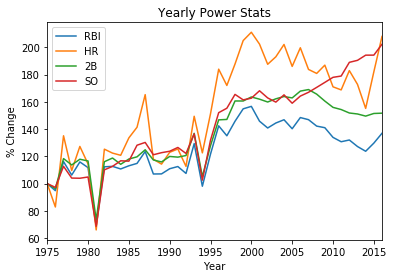

In [27]:
power = ['RBI','HR','2B','SO']
yearly_stats_multi(batting_modern,'yearID',power,'Yearly Power Stats',xlim=(1975,2016),
                  ylabel='% Change',xlabel='Year')

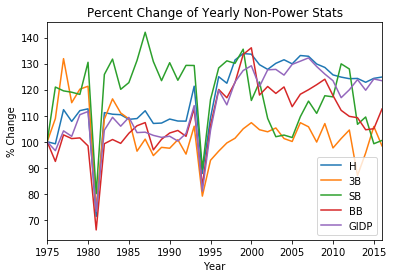

In [28]:
hit_for_avg = ['H','3B','SB','BB','GIDP']
yearly_stats_multi(batting_modern,'yearID',hit_for_avg, 'Percent Change of Yearly Non-Power Stats',
                  xlim=(1975,2016),xlabel='Year',ylabel='% Change')

### To view the trends in batting statistics, I first calculated the yearly totals for each statistic. Next I converted all of the statistics to percentage gains where the first year (1975) acts as the beginning. This will show us how each statistic (HR, SO, etc.) has increased or decreased since year 1. Next I charted the trend lines of some of the major batting categories to see how things have changed over time.

### The two charts above show the yearly sums for select batting categories. The power category graph shows these stats increasing fairly consistently and together, suggesting a moderate to high positive correlation. Home runs and strikeouts have increased the most and doubles have tailed off as of recently.

### The chart for non-power categories is much more subtle with many of the statistics current levels being around where they were in 1975 (100 on the y-axis), showing no cummulative growth over the years. Stolen bases stick out the most to me as they change quite often over the years which could shed some light into how managers and players strategize.

### The stats all take a dip around 1994-1995. This is due to a player strike which shortened the 1994 season to 113 games for most teams and 144 games in 1995. For more information visit this [Wikipedia](https://en.wikipedia.org/wiki/1994%E2%80%9395_Major_League_Baseball_strike) page.


# Investigating modern pitching data:


In [29]:
pitching_df = pd.read_csv('baseballdatabank-2017.1/core/Pitching.csv')
pitching_df.shape

(44963, 30)

In [30]:
pitching_modern = pitching_df[pitching_df['yearID'] >= 1975]
pitching_modern.shape

(23921, 30)

In [31]:
pitching_modern.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.00000,23921.000000,23921.000000,...,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,12063.000000,12063.000000,12061.000000
mean,1998.333180,1.081393,3.903098,3.903098,26.031729,7.809289,0.716400,0.19740,1.892521,209.452531,...,2.185695,2.434848,2.159191,0.387484,299.601689,7.093015,35.117386,2.141922,1.878388,5.322610
std,11.779859,0.284385,4.592096,3.993040,19.987687,11.357861,2.158014,0.65198,6.332188,198.839875,...,2.541505,2.793961,2.608337,0.900655,278.298391,11.677616,31.941844,2.710191,2.121352,5.990178
min,1975.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,1.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.00000,0.000000,51.000000,...,0.000000,0.000000,0.000000,0.000000,77.000000,0.000000,10.000000,0.000000,0.000000,1.000000
50%,2000.000000,1.000000,2.000000,3.000000,23.000000,1.000000,0.000000,0.00000,0.000000,149.000000,...,1.000000,2.000000,1.000000,0.000000,215.000000,2.000000,24.000000,1.000000,1.000000,3.000000
75%,2008.000000,1.000000,6.000000,6.000000,35.000000,13.000000,0.000000,0.00000,0.000000,294.000000,...,3.000000,4.000000,3.000000,0.000000,422.000000,9.000000,51.000000,3.000000,3.000000,8.000000
max,2016.000000,4.000000,27.000000,21.000000,94.000000,44.000000,30.000000,10.00000,62.000000,1026.000000,...,23.000000,26.000000,21.000000,16.000000,1436.000000,84.000000,166.000000,21.000000,14.000000,40.000000


### A number of pitching variables have a minimum of zero (similar to batting data). However, this is valid as not all pitchers will record a win, loss, or balk.

### Some notable stats include: 
* Max runs allowed: 166
* Max GIDP: 40
* Max batters faced (BFP): 1,436
* Max shutouts (SHO): 10

In [32]:
pitching_modern[['W','L','CG','SHO','SO','ERA','SV','WP','HBP','BFP']].corr()

,W,L,CG,SHO,SO,ERA,SV,WP,HBP,BFP
W,1.000000,0.728074,0.619933,0.571281,0.868840,-0.209833,0.009437,0.553978,0.578446,0.913038
L,0.728074,1.000000,0.515980,0.424784,0.764481,-0.150409,0.031987,0.571166,0.590680,0.880265
CG,0.619933,0.515980,1.000000,0.773529,0.527040,-0.097919,-0.089175,0.348556,0.273897,0.636170
SHO,0.571281,0.424784,0.773529,1.000000,0.501270,-0.095692,-0.081451,0.291068,0.260148,0.555821
SO,0.868840,0.764481,0.527040,0.501270,1.000000,-0.225994,0.085060,0.633614,0.626841,0.908155
ERA,-0.209833,-0.150409,-0.097919,-0.095692,-0.225994,1.000000,-0.116368,-0.140810,-0.122596,-0.210621
SV,0.009437,0.031987,-0.089175,-0.081451,0.085060,-0.116368,1.000000,0.033945,-0.028941,-0.000810
WP,0.553978,0.571166,0.348556,0.291068,0.633614,-0.140810,0.033945,1.000000,0.455774,0.631533
HBP,0.578446,0.590680,0.273897,0.260148,0.626841,-0.122596,-0.028941,0.455774,1.000000,0.651666
BFP,0.913038,0.880265,0.636170,0.555821,0.908155,-0.210621,-0.000810,0.631533,0.651666,1.000000


### Unlike for batting statistics, pitching statistics generally don't show the same degree of correlation. Batters faced per pitcher (BFP) has a high degree of positive correlation with positive categories (W, SO) and negative categories (L, WP, HBP) which could be due to the same factors which make strikeouts highly correlated with home runs and doubles for batters.

### ERA generally has very low correlation levels and is negative (albeit very low) for both wins and losses. I would think losses would be positively correlated with ERA (they rise or fall together) but this could be explained by more complex factors not captured in this data (including team defense, pitches thrown, or supporting runs for the pitcher).

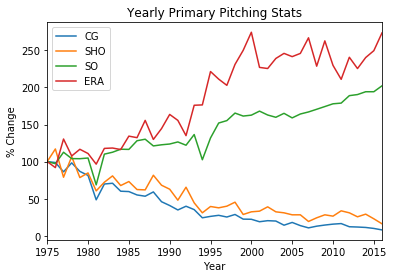

In [33]:
key_pitching_stats = ['CG','SHO','SO','ERA']
yearly_stats_multi(pitching_modern,'yearID',key_pitching_stats,'Yearly Primary Pitching Stats',
                   xlim=(1975,2016),xlabel='Year',ylabel='% Change')

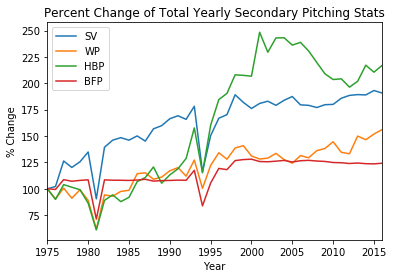

In [34]:
secondary_pitching_stats = ['SV','WP','HBP','BFP']
yearly_stats_multi(pitching_modern,'yearID',secondary_pitching_stats,'Percent Change of Total Yearly Secondary Pitching Stats',
                  xlim=(1975,2016),xlabel='Year',ylabel='% Change')

### To analyze pitching trends I followed a similar process when investigating batting trends, the only difference being the data supplied (pitching data here).

### The above two charts show select pitching statistics behavior since 1975. ERA and strikeouts have increased dramatically while shutouts and complete games have steadily decreased. This can be attributed to more so called "power pitchers" and a greater emphasis on pitch count in recent years. 

### Additionally, Tommy John surgery was introduced in 1974 to repair ligament in pitching arms and perhaps is a reason why pitchers don't complete games as much in the modern era. This can also explain the increase in saves. For more information on the history of Tommy John visit this [article](https://www.sportingcharts.com/articles/mlb/tommy-john-surgery-statistics.aspx) and see the chart below. It is also interesting to see batters hit by pitch (HBP) has increased so dramatically over the years.

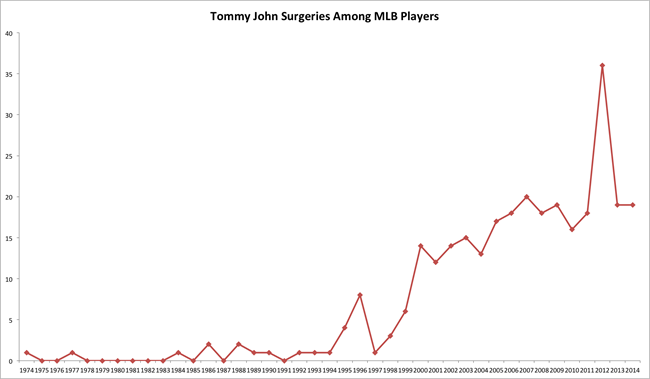

In [35]:
from IPython.display import Image
Image(filename='tommy_john_surgeries.jpg')

# Investigating salary data:

In [36]:
# importing salary file, exploring basic demographics
salary_df = pd.read_csv('baseballdatabank-2017.1/core/Salaries.csv')
salary_df.shape

(26428, 5)

In [37]:
salary_df.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


In [38]:
salary_df[salary_df['salary'] == 0]

,yearID,teamID,lgID,playerID,salary
6179,1993,NYA,AL,jamesdi01,0
12007,1999,PIT,NL,martija02,0


In [39]:
salary_df[(salary_df['playerID'] == 'jamesdi01')]

,yearID,teamID,lgID,playerID,salary
1302,1987,ATL,NL,jamesdi01,120000
1929,1988,ATL,NL,jamesdi01,360000
2591,1989,ATL,NL,jamesdi01,400000
3536,1990,CLE,AL,jamesdi01,650000
5293,1992,NYA,AL,jamesdi01,387500
6179,1993,NYA,AL,jamesdi01,0
8019,1995,NYA,AL,jamesdi01,350000


In [40]:
salary_df[(salary_df['playerID'] == 'martija02')]

,yearID,teamID,lgID,playerID,salary
11011,1998,PIT,NL,martija02,170000
12007,1999,PIT,NL,martija02,0


### The above tables show that there are two players who have a recorded salary of $0. This is not something that should typically happen and there should be an answer somewhere.

In [41]:
master_df[(master_df['playerID'] == 'martija02') | (master_df['playerID'] == 'jamesdi01')][['nameFirst','nameLast']]

,nameFirst,nameLast
8384,Dion,James
10755,Javier,Martinez


In [42]:
print 'Searching for zero salary player pitching statistics.'
pitching_modern[((pitching_modern['playerID'] == 'martija02') | (pitching_modern['playerID'] == 'jamesdi01')) &
               ((pitching_modern['yearID'] == 1993) | (pitching_modern['yearID'] == 1999))]

Searching for zero salary player pitching statistics.


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP


In [43]:
print 'Searching for zero salary player batting statistics.'
batting_modern[((batting_modern['playerID'] == 'martija02') | (batting_modern['playerID'] == 'jamesdi01')) &
               ((batting_modern['yearID'] == 1993) | (batting_modern['yearID'] == 1999))]

Searching for zero salary player batting statistics.


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
71198,jamesdi01,1993,1,NYA,AL,115,343,62,114,21,...,36.0,0.0,0.0,31,31.0,1.0,2.0,1.0,1.0,5.0


### Baseball-Reference, a pretty reputable source, also has [Dion James's](https://www.baseball-reference.com/players/j/jamesdi01.shtml#all_br-salaries) and [Javier Martinez's](https://www.baseball-reference.com/players/m/martija02.shtml#all_br-salaries) salaries as $0 for each year, so this may be a reporting problem, some sort of penalty, or some other contract the player worked out with the team.

### The above tables show that neither player pitched while they have a recorded salary of zero dollars. However, Dion James played 115 games in 1993 with a recorded salary of zero dollars. Not only that, he recorded 114 hits which is fairly good for a batter. From this information it might make sense that Javier Martinez has a recorded salary of <span>$0</span> since he didn't record any pitching or batting statistics but we still have a question mark for Dion James which we still cannot get a definitive answer based on this data.

In [44]:
salary_df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [45]:
annual_salary_mean = salary_df.groupby('yearID').mean()['salary']
annual_salary_median = salary_df.groupby('yearID').median()['salary']

(1985, 2016)

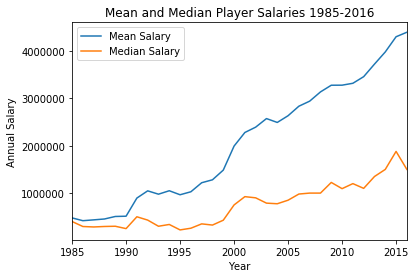

In [46]:
plt.plot(annual_salary_mean)
plt.plot(annual_salary_median)
plt.title('Mean and Median Player Salaries 1985-2016')
plt.legend(['Mean Salary','Median Salary'],loc='best')
plt.xlabel('Year')
plt.ylabel('Annual Salary')
plt.xlim(1985,2016)


In [47]:
annual_sum_salary_teams = salary_df.groupby(['teamID','yearID']).sum()

In [48]:
print 'Maximum annual total team salary is: ', annual_sum_salary_teams.idxmax()
print 'Minimum annual total salary is: ', annual_sum_salary_teams.idxmin()

Maximum annual total team salary is:  salary    (NYA, 2013)
dtype: object
Minimum annual total salary is:  salary    (TEX, 1987)
dtype: object


In [49]:
print 'Highest team salary: ', annual_sum_salary_teams.loc['NYA'].loc[2013]
print 'Lowest team salary: ', annual_sum_salary_teams.loc['TEX'].loc[1987]

Highest team salary:  salary    231978886
Name: 2013, dtype: int64
Lowest team salary:  salary    880000
Name: 1987, dtype: int64


### From the chart above we can see that player salaries have been increasing over time. They both have increased at a greater pace since around year 2000, after which the mean salary diverges from the median. From this data it seems that the top players are earning a greater proportion than typical players.

### The highest team salary was by the New York Yankees in 2013 (231,978,886) and the lowest team salary was recorded by the Texas Rangers in 1987 (880,000).

In [50]:
team_totals = salary_df.groupby(['yearID','teamID']).sum()
team_means = salary_df.groupby(['yearID','teamID']).mean()
team_medians = salary_df.groupby(['yearID','teamID']).median()

In [51]:
index_level_1 = team_totals.index.levels[0]
index_level_2 = team_totals.index.levels[1]

In [52]:
from collections import defaultdict
highest_team_salaries = defaultdict(list)
for year in index_level_1:
    team = team_totals.loc[year].idxmax()['salary']
    salary = team_totals.loc[year].loc[team]['salary']
    highest_team_salaries[team].append([salary, year])

In [53]:
highest_team_salaries

defaultdict(list,
            {'ATL': [[14807000, 1985], [49383513, 1994]],
             'BAL': [[54490315, 1996], [72355634, 1998]],
             'KCA': [[23361084, 1990]],
             'LAN': [[21071562, 1989], [217014600, 2014], [215792000, 2015]],
             'NYA': [[18494253, 1986],
              [17099714, 1987],
              [19441152, 1988],
              [62241545, 1997],
              [86734359, 1999],
              [92338260, 2000],
              [112287143, 2001],
              [125928583, 2002],
              [152749814, 2003],
              [184193950, 2004],
              [208306817, 2005],
              [194663079, 2006],
              [189259045, 2007],
              [207896789, 2008],
              [201449189, 2009],
              [206333389, 2010],
              [202275028, 2011],
              [196522289, 2012],
              [231978886, 2013]],
             'NYY': [[222997792, 2016]],
             'OAK': [[36999167, 1991]],
             'TOR': [[44788666, 1992],

### From the above printout we can see that the New York Yankees (NYA and NYY) have by far the most years of highest total team salaries. From 1999-2013 they held consistent with the highest payroll.

### Kansas City Royals (1990), Oakland Athletics (1991), and Toronto Blue Jays (1992,1993,1995) are notable as they are in "small markets" yet have had the highest payrolls at times. Oakland appeared in the World Series between 1988-1990 and the Blue Jays were in the World Series in 1992 and 1993. Source [Wikipedia](https://en.wikipedia.org/wiki/List_of_World_Series_champions).

# Investigating the characteristics of top salary players vs medium salary players:

In [54]:
def add_quantile(row,quantiles):
#     for row in range(df.shape[0]):
    year = row['yearID']
    player_salary = row['salary']
    if len(quantiles) == 1:
        top_quantile = quantiles[0].loc[year]['salary']
        if player_salary > top_quantile:
            return 1
        else:
            return 0
    else:
        bottom_quantile = quantiles[0].loc[year]['salary']
        top_quantile = quantiles[1].loc[year]['salary']
        if player_salary > bottom_quantile and player_salary <= top_quantile:
            return 1
        else:
            return 0
        
def add_quantiles(df,quantiles,col_name):
    df[col_name] = df.apply(add_quantile,args=[quantiles],axis=1)

In [55]:
# 90th quantile threshold:
player_salaries_quantiles_90 = salary_df.groupby(['yearID']).quantile(.9)

# 50th quantile (median) threshold:
player_salaries_quantiles_50 = salary_df.groupby(['yearID']).quantile(.5)
# 60th quantile threshold:
player_salaries_quantiles_60 = salary_df.groupby(['yearID']).quantile(.6)

# adding top quantile
add_quantiles(salary_df,[player_salaries_quantiles_90],'top_quantile')
# adding .5-.6 quantile range
quantile_range = [player_salaries_quantiles_50,player_salaries_quantiles_60]
add_quantiles(salary_df,quantile_range,'quant_50_60')

print 'Proportion of players between the 50th and 60th percentile: ', salary_df['quant_50_60'].mean()
print 'Proportion of players in the 90th percentile: ',salary_df['top_quantile'].mean()

Proportion of players between the 50th and 60th percentile:  0.0973588618132
Proportion of players in the 90th percentile:  0.0990994399879


In [56]:
pitching_salary = salary_df.merge(pitching_modern,on=['playerID','yearID'],how='inner')
pitching_salary.shape

(13361, 35)

In [57]:
top_pitching = pitching_salary[pitching_salary['top_quantile'] == 1]
mid_pitching = pitching_salary[pitching_salary['quant_50_60'] == 1]
print 'Top Pitching shape: ', top_pitching.shape
print 'Mid Pitching shape: ', mid_pitching.shape

Top Pitching shape:  (1070, 35)
Mid Pitching shape:  (1305, 35)


In [58]:
top_pitching_mean = top_pitching.groupby('yearID').mean()
top_pitching_median = top_pitching.groupby('yearID').median()

mid_pitching_mean = mid_pitching.groupby('yearID').mean()
mid_pitching_median = mid_pitching.groupby('yearID').median()

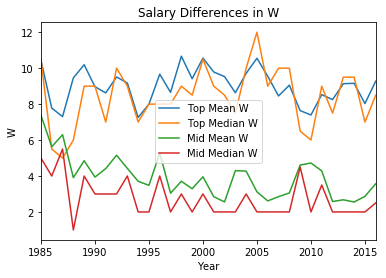

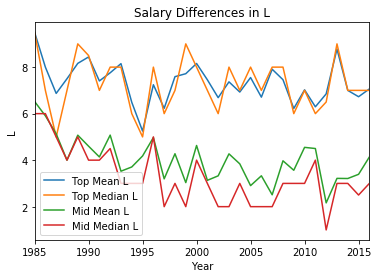

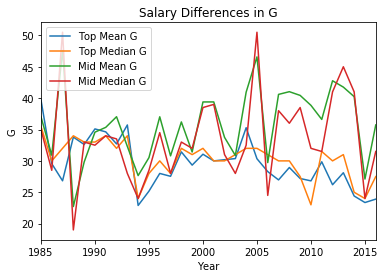

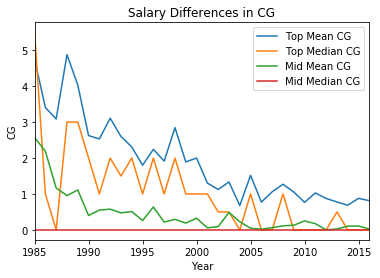

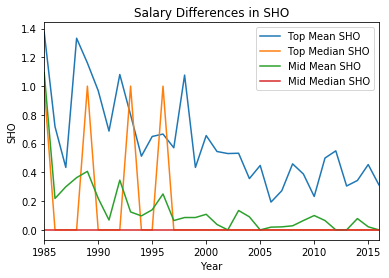

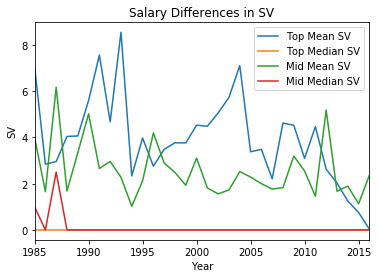

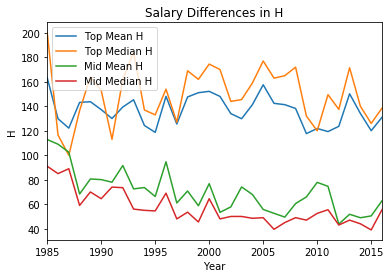

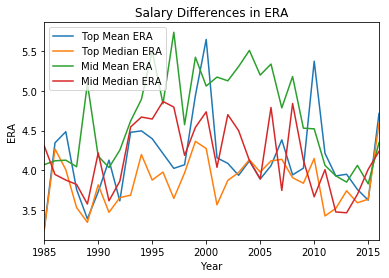

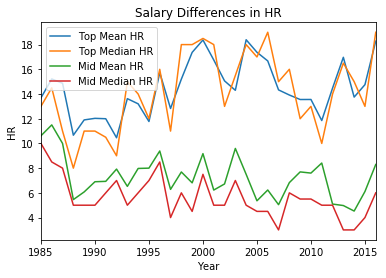

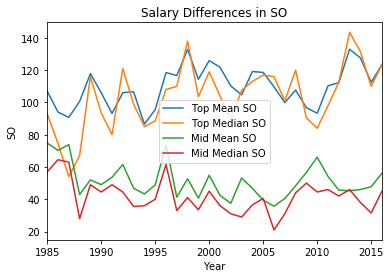

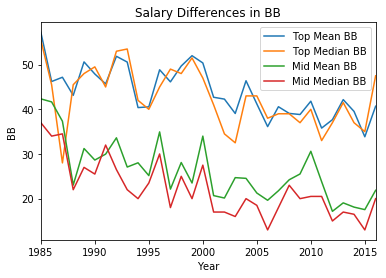

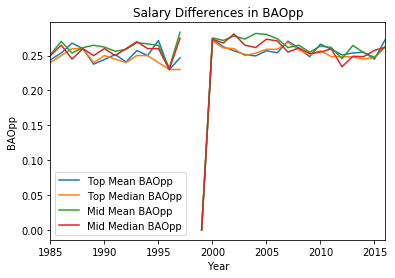

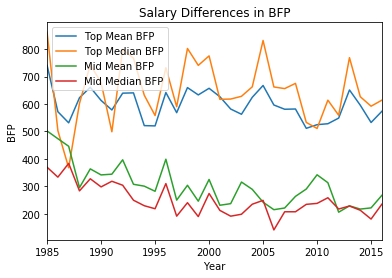

In [59]:
pitching_stats = ['W','L','G','CG','SHO','SV','H','ERA','HR','SO','BB','BAOpp','BFP']
for stat in pitching_stats:
    plt.plot(top_pitching_mean[stat])
    plt.plot(top_pitching_median[stat])
    plt.plot(mid_pitching_mean[stat])
    plt.plot(mid_pitching_median[stat])
    plt.legend(['Top Mean ' + stat,'Top Median ' + stat, 
                'Mid Mean ' + stat, 'Mid Median ' + stat],loc='best')
    plt.title('Salary Differences in ' + stat)
    plt.xlim(1985,2016)
    plt.xlabel('Year')
    plt.ylabel(stat)
    plt.show()

### First I calculated the 90th percentile per year, the 50th percentile per year, and the 60th percentile per year for player salaries. Then I created a function to add a two new variables to the salary dataset: 
* 'top_quantile' equals 1 if the player's salary is greater than the 90th percentile for a given year, or else it equals 0
* 'quant_50_60' equals 1 if the player's salary falls between the 50th and 60th percentile for a given year, or else it equals 0

### I merged the salary dataset to the pitching dataset on the columns playerID and yearID using an inner join, which creates a new dataset with rows containing all columns from the salary and pitching dataset where a player's ID and year ID match up for both datasets. Then I split the data into two new datasets: one containing the top earners ('top_quantile' == 1) and one containing the mid level earners ('quant_50_60' == 1). Next I grouped these two new datasets by year to obtain the yearly median and means for select statistics. Lastly, I charted the trends (see above). Below I will follow the same procedure on batting statistics.


### From the above set of charts we can see that the top earners do drastically outperform the mid level performers in nearly every category. Total games are similar for both categories of pitcher but the top earners have much greater win totals, batters faced, and strikeouts. They also have higher levels of the negative statistics which can be attributed to more time spent pitching and thus more opportunity to give up home runs or walk batters.

### Additionally, ERA and opponent batting average seem to be relatively consistent between the two groups of players. This could perhaps be due to real time game factors such as the defense behind a pitcher. ERA is based on how many runs a pitcher allows and also how many innings he pitches, so some of the top earning pitchers might play very often and have more opportunities to allow runs, whereas pitchers who don't play often might have an artificially low ERA. This might suggest a common mean for pitcher ERA across all players when normalized with enough innings pitched. The similarities in opponent batting averages is more difficult to explain and thus might require more advanced statistical methods.

In [60]:
batting_salary = salary_df.merge(batting_modern,on=['playerID','yearID'],how='inner')
print 'df shape: ', batting_salary.shape
print 'Proportion of players between the 50th and 60th percentile: ',batting_salary['quant_50_60'].mean()
print 'Proportion of players in the 90th percentile: ',batting_salary['top_quantile'].mean()

df shape:  (28287, 27)
Proportion of players between the 50th and 60th percentile:  0.101495386573
Proportion of players in the 90th percentile:  0.0975359705872


In [61]:
top_batting = batting_salary[batting_salary['top_quantile'] == 1]
mid_batting = batting_salary[batting_salary['quant_50_60'] == 1]
print 'Top Batting shape: ', top_batting.shape
print 'Mid Bating shape: ', mid_batting.shape

Top Batting shape:  (2759, 27)
Mid Bating shape:  (2871, 27)


In [62]:
top_batting_stats_mean = top_batting.groupby('yearID').mean()
mid_batting_stats_mean = mid_batting.groupby('yearID').mean()
top_batting_stats_median = top_batting.groupby('yearID').median()
mid_batting_stats_median = mid_batting.groupby('yearID').median()

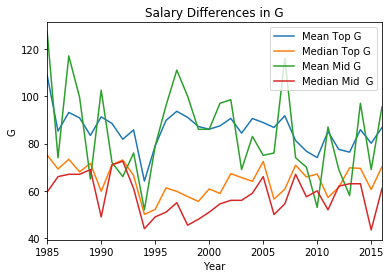

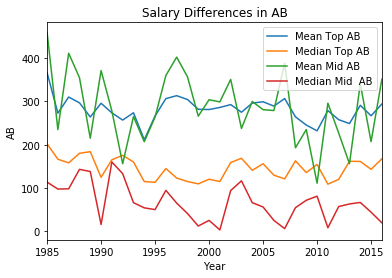

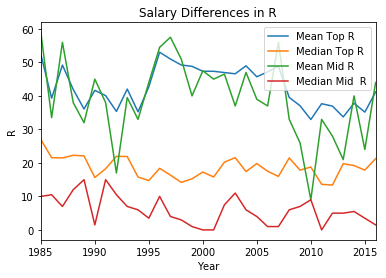

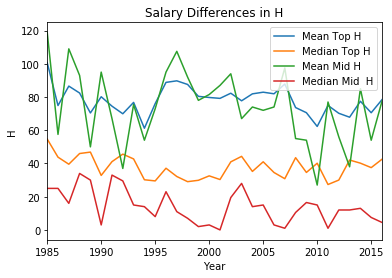

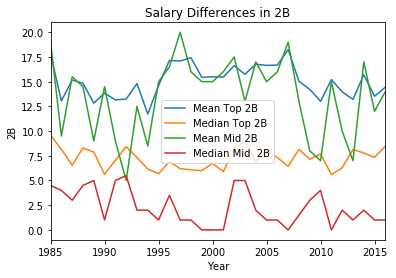

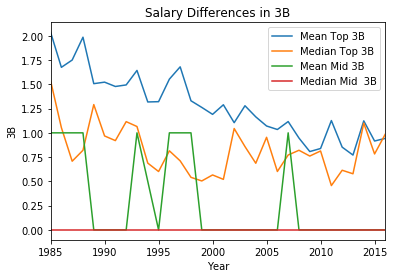

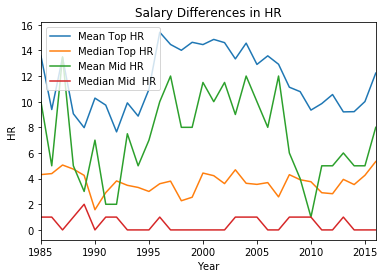

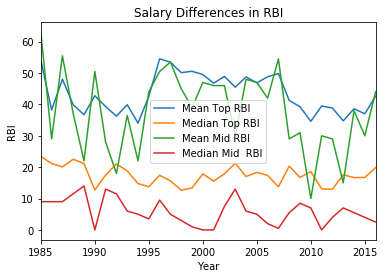

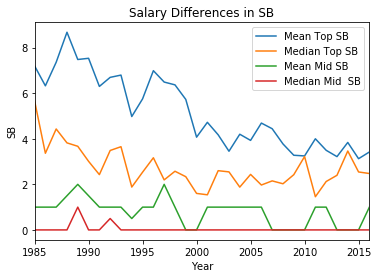

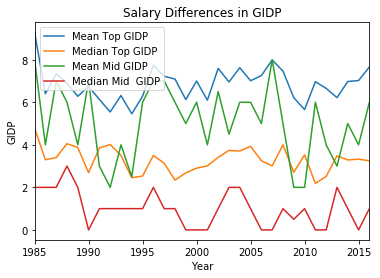

In [63]:
stats = ['G','AB','R','H','2B','3B','HR','RBI','SB','GIDP']
for stat in stats:
    plt.plot(top_batting_stats_mean[stat])
    plt.plot(mid_batting_stats_mean[stat])
    plt.plot(top_batting_stats_median[stat])
    plt.plot(mid_batting_stats_median[stat])
    plt.legend(['Mean Top ' + stat,'Median Top ' +stat,
               'Mean Mid ' + stat, 'Median Mid  ' + stat],loc='best')
    plt.title('Salary Differences in ' + stat)
    plt.xlim(1985, 2016)
    plt.xlabel('Year')
    plt.ylabel(stat)
    plt.show()

### Many categories (G, AB, R, H, 2B, RBI) have similar means for each set of earners, however top earners generally have higher medians in categories than mid earners. This could mean that a few mid level players are breakout stars and bringing the mean up in these categories, thus positively skewing the data. It is difficult to say why these players aren't earning salaries in the top 90th percentile, but there are some plausible explanations. The player might be under contract for a mid level amount or they might have a fluke year and perform higher than normal. Additionally, some of the top earners might be experiencing the opposite effects and might not put in their best effort after already signing a top level contract or they might simply have a bad year.

### Surprisingly, batters who earn mid level salaries have a higher mean games played and at bats than top earners. This might not make sense at first glance as you would expect the top earners to play and contribute more. However, an explanation may be that the mid level earners are still trying to "break through" or prove themselves. Additionally, some managers might be more cautious with higher paid players, therefore giving them days off throughout the season in order to recuperate.

### Home runs are the only statistic that is nearly always higher for top earners than mid earners, perhaps suggesting that this is the key reason why some players make more than others. However, this analysis doesn't look at fielding statistics, player intangibles, or a few other batting statistics.


### There were few limitations faced in this analysis. This is due to the fact that the Lahman database is relatively clean and provides very detailed data. Some missing values occurred in fields that were only recorded in recent years but this was not an issue as this analysis looked at modern data. Additionally, player's death information was missing for quite a few modern players, but this was acceptable as these players most likely are still alive. To solve this I changed these values to 0 to distinguish between valid and invalid (not deceased) players. 

### One thing I would do in the future is to classify players based on position (which can be found in the Appearances table) in order to further analyze which positions obtain the highest salaries and look into performance metrics based on position.